In [ ]:
from google.colab import files
files.upload()  # Click "Choose Files" and upload your kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shahdalaa11111111","key":"117a8a3a4eba7616a05e4406d69f5e59"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
bhadramohit/customer-shopping-latest-trends-dataset         Customer Shopping (Latest Trends) Dataset         76KB  2024-11-23 15:26:12          19170        377  1.0              
hopesb/student-depression-dataset                           Student Depression Dataset.                      454KB  2024-11-22 17:56:03          15684        222  1.0              
oktayrdeki/houses-in-london                                 Houses in London                                  21KB  2024-12-15 19:27:42           1418         27  1.0              
mhassansaboor/intel-stock-data-1980-2024                    Intel Stock Data (1980-2024)       

In [ ]:
!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 50% 30.0M/60.3M [00:00<00:00, 126MB/s]
100% 60.3M/60.3M [00:00<00:00, 186MB/s]


In [ ]:
import zipfile
import os

# Extract the zip file
with zipfile.ZipFile("fer2013.zip", 'r') as zip_ref:
    zip_ref.extractall("fer2013_data")


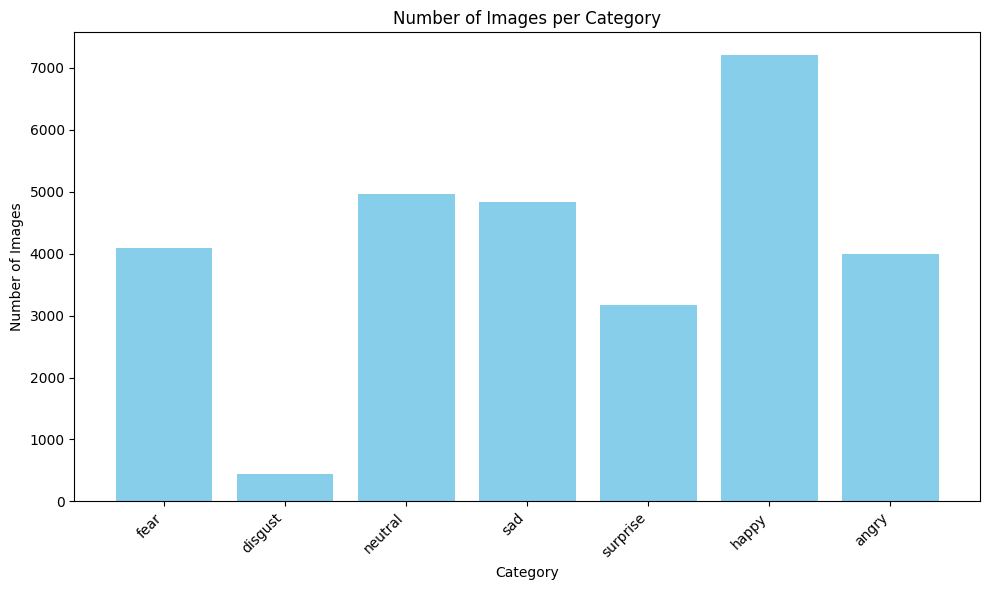

In [ ]:
import os
import matplotlib.pyplot as plt


def plot_image_counts_per_category(dataset_path):
    """
    Plot the number of images in each category of the dataset.

    Args:
        dataset_path (str): Path to the dataset where each category is a subdirectory.
    """
    categories = []
    image_counts = []

    # Loop through each category (subdirectory) in the dataset
    for category in os.listdir(dataset_path):
        category_dir = os.path.join(dataset_path, category)
        if os.path.isdir(category_dir):
            # Count the number of images in the category
            num_images = len([f for f in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, f))])
            categories.append(category)
            image_counts.append(num_images)

    # Plot the image counts
    plt.figure(figsize=(10, 6))
    plt.bar(categories, image_counts, color='skyblue')
    plt.xlabel('Category')
    plt.ylabel('Number of Images')
    plt.title('Number of Images per Category')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage
dataset_path = '/content/fer2013_data/train'  # Replace with the path to your dataset
plot_image_counts_per_category(dataset_path)


## imbalanced Data


In [ ]:
import os

# Path to the dataset folder
dataset_path = '/content/fer2013_data/train'

# Dictionary to hold the count of images per category
category_counts = {}

# Iterate over all directories in the dataset
for category in os.listdir(dataset_path):
    category_dir = os.path.join(dataset_path, category)
    if os.path.isdir(category_dir):
        # Count the number of image files in the directory
        image_count = len([file for file in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, file))])
        category_counts[category] = image_count

# Print the counts for each category
for category, count in category_counts.items():
    print(f"Category: {category}, Number of Images: {count}")


Category: fear, Number of Images: 4097
Category: disgust, Number of Images: 436
Category: neutral, Number of Images: 4965
Category: sad, Number of Images: 4830
Category: surprise, Number of Images: 3171
Category: happy, Number of Images: 7215
Category: angry, Number of Images: 3995


In [ ]:
import os

# Path to the dataset folder
dataset_path = '/content/fer2013_data/test'

# Dictionary to hold the count of images per category
category_counts = {}

# Iterate over all directories in the dataset
for category in os.listdir(dataset_path):
    category_dir = os.path.join(dataset_path, category)
    if os.path.isdir(category_dir):
        # Count the number of image files in the directory
        image_count = len([file for file in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, file))])
        category_counts[category] = image_count

# Print the counts for each category
for category, count in category_counts.items():
    print(f"Category: {category}, Number of Images: {count}")


Category: fear, Number of Images: 1024
Category: disgust, Number of Images: 111
Category: neutral, Number of Images: 1233
Category: sad, Number of Images: 1247
Category: surprise, Number of Images: 831
Category: happy, Number of Images: 1774
Category: angry, Number of Images: 958


## Standardize dataset by balancing the number of samples per category

## Test

In [ ]:
import os
import random
from PIL import Image, ImageOps
from tqdm import tqdm

def augment_image(image):
    """
    Perform basic data augmentation on an image.
    Augmentations include horizontal flip, rotation, and color enhancement.
    """
    augmentations = [
        lambda x: ImageOps.mirror(x),  # Horizontal flip
        lambda x: x.rotate(15),        # Rotate 15 degrees
        lambda x: x.rotate(-15),       # Rotate -15 degrees
        lambda x: ImageOps.autocontrast(x),  # Auto contrast
    ]
    augmentation = random.choice(augmentations)
    return augmentation(image)

def augment_dataset(dataset_path, output_path,  target_count=1300):
    """
    Perform data augmentation for each category in the dataset to achieve the target count.

    Args:
        dataset_path (str): Path to the input dataset.
        output_path (str): Path to save the augmented dataset.
        target_count (int): Number of images per category after augmentation.
    """
    os.makedirs(output_path, exist_ok=True)

    for category in os.listdir(dataset_path):
        category_dir = os.path.join(dataset_path, category)
        if not os.path.isdir(category_dir):
            continue

        # List all image files in the category
        image_files = [f for f in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, f))]
        current_count = len(image_files)

        # Determine output directory for the category
        output_category_dir = os.path.join(output_path, category)
        os.makedirs(output_category_dir, exist_ok=True)

        # Augment images to meet the target count
        if current_count < target_count:
            extra_needed = target_count - current_count
            extra_images = random.choices(image_files, k=extra_needed)
            for extra_image in tqdm(extra_images, desc=f"Augmenting {category}"):
                image_path = os.path.join(category_dir, extra_image)
                try:
                    with Image.open(image_path) as img:
                        augmented_image = augment_image(img)
                        new_file_name = f"aug_{len(image_files)}.jpg"
                        augmented_image.save(os.path.join(output_category_dir, new_file_name))
                        image_files.append(new_file_name)
                except Exception as e:
                    print(f"Error augmenting {image_path}: {e}")

    print("Data augmentation complete!")

dataset_path = '/content/fer2013_data/test'  # Path to your dataset
output_path = '/content/augmented_test_dataset'  # Path to save augmented dataset
augment_dataset(dataset_path, output_path, target_count=1300)



Augmenting angry: 100%|██████████| 342/342 [00:00<00:00, 1956.26it/s]

Data augmentation complete!


In [ ]:
import os
from PIL import Image
from tqdm import tqdm

def resize_images(dataset_path, output_path, target_size=(224, 224)):
    """
    Resize images in each category of the dataset to the target size.

    Args:
        dataset_path (str): Path to the input dataset.
        output_path (str): Path to save the resized images.
        target_size (tuple): Target size for all images (width, height).
    """
    os.makedirs(output_path, exist_ok=True)

    for category in os.listdir(dataset_path):
        category_dir = os.path.join(dataset_path, category)
        if not os.path.isdir(category_dir):
            continue

        # List all image files in the category
        image_files = [f for f in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, f))]
        current_count = len(image_files)

        # Determine output directory for the category
        output_category_dir = os.path.join(output_path, category)
        os.makedirs(output_category_dir, exist_ok=True)

        # Resize and save images
        for i, image_file in enumerate(tqdm(image_files, desc=f"Resizing {category}")):
            image_path = os.path.join(category_dir, image_file)
            output_image_path = os.path.join(output_category_dir, f"{i+1}.jpg")
            try:
                with Image.open(image_path) as img:
                    img = img.resize(target_size)
                    img.save(output_image_path, format="JPEG")
            except Exception as e:
                print(f"Error processing {image_path}: {e}")

    print("Image resizing complete!")

dataset_path = '/content/augmented_test_dataset'  # Path to your dataset
output_path = '/content/Final_Test_dataset'  # Path to save resized dataset
resize_images(dataset_path, output_path, target_size=(224, 224))


Resizing surprise: 100%|██████████| 469/469 [00:00<00:00, 1037.01it/s]
Resizing happy: 0it [00:00, ?it/s]
Resizing angry: 100%|██████████| 342/342 [00:00<00:00, 1061.11it/s]

Image resizing complete!


In [ ]:
import os

# Path to the dataset folder
dataset_path = '/content/Final_Test_dataset'

# Dictionary to hold the count of images per category
category_counts = {}

# Iterate over all directories in the dataset
for category in os.listdir(dataset_path):
    category_dir = os.path.join(dataset_path, category)
    if os.path.isdir(category_dir):
        # Count the number of image files in the directory
        image_count = len([file for file in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, file))])
        category_counts[category] = image_count

# Print the counts for each category
for category, count in category_counts.items():
    print(f"Category: {category}, Number of Images: {count}")

Category: fear, Number of Images: 276
Category: disgust, Number of Images: 1189
Category: neutral, Number of Images: 67
Category: sad, Number of Images: 53
Category: surprise, Number of Images: 469
Category: happy, Number of Images: 0
Category: angry, Number of Images: 342


## Train

In [ ]:
import os
import random
from PIL import Image, ImageOps
from tqdm import tqdm

def augment_image(image):
    """
    Perform basic data augmentation on an image.
    Augmentations include horizontal flip, rotation, and color enhancement.
    """
    augmentations = [
        lambda x: ImageOps.mirror(x),  # Horizontal flip
        lambda x: x.rotate(15),        # Rotate 15 degrees
        lambda x: x.rotate(-15),       # Rotate -15 degrees
        lambda x: ImageOps.autocontrast(x),  # Auto contrast
    ]
    augmentation = random.choice(augmentations)
    return augmentation(image)

def augment_dataset(dataset_path, output_path, target_count=100):
    """
    Perform data augmentation for each category in the dataset to achieve the target count.

    Args:
        dataset_path (str): Path to the input dataset.
        output_path (str): Path to save the augmented dataset.
        target_count (int): Number of images per category after augmentation.
    """
    os.makedirs(output_path, exist_ok=True)

    for category in os.listdir(dataset_path):
        category_dir = os.path.join(dataset_path, category)
        if not os.path.isdir(category_dir):
            continue

        # List all image files in the category
        image_files = [f for f in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, f))]
        current_count = len(image_files)

        # Determine output directory for the category
        output_category_dir = os.path.join(output_path, category)
        os.makedirs(output_category_dir, exist_ok=True)

        # Augment images to meet the target count
        if current_count < target_count:
            extra_needed = target_count - current_count
            extra_images = random.choices(image_files, k=extra_needed)
            for extra_image in tqdm(extra_images, desc=f"Augmenting {category}"):
                image_path = os.path.join(category_dir, extra_image)
                try:
                    with Image.open(image_path) as img:
                        augmented_image = augment_image(img)
                        new_file_name = f"aug_{len(image_files)}.jpg"
                        augmented_image.save(os.path.join(output_category_dir, new_file_name))
                        image_files.append(new_file_name)
                except Exception as e:
                    print(f"Error augmenting {image_path}: {e}")

    print("Data augmentation complete!")

dataset_path = '/content/fer2013_data/train'  # Path to your dataset
output_path = '/content/augmented_train_dataset'  # Path to save augmented dataset
augment_dataset(dataset_path, output_path, target_count=4500)



Augmenting angry: 100%|██████████| 505/505 [00:00<00:00, 1785.99it/s]

Data augmentation complete!


In [ ]:
import os
from PIL import Image
from tqdm import tqdm

def resize_images(dataset_path, output_path, target_size=(224, 224)):
    """
    Resize images in each category of the dataset to the target size.

    Args:
        dataset_path (str): Path to the input dataset.
        output_path (str): Path to save the resized images.
        target_size (tuple): Target size for all images (width, height).
    """
    os.makedirs(output_path, exist_ok=True)

    for category in os.listdir(dataset_path):
        category_dir = os.path.join(dataset_path, category)
        if not os.path.isdir(category_dir):
            continue

        # List all image files in the category
        image_files = [f for f in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, f))]
        current_count = len(image_files)

        # Determine output directory for the category
        output_category_dir = os.path.join(output_path, category)
        os.makedirs(output_category_dir, exist_ok=True)

        # Resize and save images
        for i, image_file in enumerate(tqdm(image_files, desc=f"Resizing {category}")):
            image_path = os.path.join(category_dir, image_file)
            output_image_path = os.path.join(output_category_dir, f"{i+1}.jpg")
            try:
                with Image.open(image_path) as img:
                    img = img.resize(target_size)
                    img.save(output_image_path, format="JPEG")
            except Exception as e:
                print(f"Error processing {image_path}: {e}")

    print("Image resizing complete!")

dataset_path = '/content/augmented_train_dataset'  # Path to your dataset
output_path = '/content/Final_Train_dataset'  # Path to save resized dataset
resize_images(dataset_path, output_path, target_size=(224, 224))


Resizing disgust: 100%|██████████| 4064/4064 [00:04<00:00, 912.70it/s]
Resizing neutral: 0it [00:00, ?it/s]
Resizing sad: 0it [00:00, ?it/s]
Resizing surprise: 100%|██████████| 1329/1329 [00:01<00:00, 803.75it/s] 
Resizing happy: 0it [00:00, ?it/s]
Resizing angry: 100%|██████████| 505/505 [00:00<00:00, 1112.62it/s]

Image resizing complete!


In [ ]:
import os

# Path to the dataset folder
dataset_path = 'Train_dataset'

# Dictionary to hold the count of images per category
category_counts = {}

# Iterate over all directories in the dataset
for category in os.listdir(dataset_path):
    category_dir = os.path.join(dataset_path, category)
    if os.path.isdir(category_dir):
        # Count the number of image files in the directory
        image_count = len([file for file in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, file))])
        category_counts[category] = image_count

# Print the counts for each category
for category, count in category_counts.items():
    print(f"Category: {category}, Number of Images: {count}")

Category: fear, Number of Images: 4500
Category: disgust, Number of Images: 4500
Category: neutral, Number of Images: 4500
Category: sad, Number of Images: 4500
Category: surprise, Number of Images: 4500
Category: happy, Number of Images: 4500
Category: angry, Number of Images: 4500


## Delete حبه حجات كدا

In [ ]:
import shutil
import os

# تحديد مسار مجلد البيانات
dataset_path = '/content/Test_dataset'  # المسار الأساسي للبيانات

# تحديد الفئة التي تريد حذفها
category_to_remove = '/content/processed_train_dataset'  # الفئة التي تريد حذفها

# تحديد المسار الكامل للفئة
category_path = os.path.join(dataset_path, category_to_remove)

# تحقق إذا كانت الفئة موجودة ثم حذفها
if os.path.exists(category_path):
    shutil.rmtree(category_path)
    print(f"تم حذف الفئة: {category_to_remove}")
else:
    print(f"الفئة {category_to_remove} غير موجودة في المسار.")


تم حذف الفئة: /content/processed_train_dataset


# TT

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory # Changed tf to tensorflow

In [ ]:
train_dataset = image_dataset_from_directory("/content/Train_dataset", color_mode = 'grayscale',  image_size=(48, 48), batch_size=64)
test_dataset = image_dataset_from_directory("/content/Test_dataset", color_mode = 'grayscale' , image_size=(48, 48), batch_size=64)

Found 27000 files belonging to 6 classes.
Found 7800 files belonging to 6 classes.


In [ ]:
def normalize(img , label):
  return img /255.0 , label

train_dataset = train_dataset.map(normalize)

test_dataset = test_dataset.map(normalize)

In [ ]:
next(iter(train_dataset))

(<tf.Tensor: shape=(64, 48, 48, 1), dtype=float32, numpy=
 array([[[[0.7254902 ],
          [0.7411765 ],
          [0.7490196 ],
          ...,
          [0.1254902 ],
          [0.09803922],
          [0.08235294]],
 
         [[0.7254902 ],
          [0.74509805],
          [0.75686276],
          ...,
          [0.18431373],
          [0.14509805],
          [0.12156863]],
 
         [[0.7254902 ],
          [0.7490196 ],
          [0.7647059 ],
          ...,
          [0.26666668],
          [0.22352941],
          [0.19607843]],
 
         ...,
 
         [[0.5058824 ],
          [0.5568628 ],
          [0.61960787],
          ...,
          [0.5686275 ],
          [0.58431375],
          [0.6117647 ]],
 
         [[0.49803922],
          [0.49411765],
          [0.5254902 ],
          ...,
          [0.58431375],
          [0.6039216 ],
          [0.6392157 ]],
 
         [[0.5254902 ],
          [0.45490196],
          [0.42745098],
          ...,
          [0.59607846],
     

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#early = EarlyStopping(monitor = 'accuracy' , patience =3)

In [ ]:
from keras.layers import Dropout

model = Sequential([

    Conv2D(128, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(16, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(10, activation='sigmoid'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(7, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
!pip install ultralytics


In [ ]:
train: /content/Train_dataset  # Path to train images
val: /content/Test_dataset  # Path to validation images

nc: 6
names: ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']  # List of class names



In [ ]:
from ultralytics import YOLO

# تحميل نموذج YOLO (يمكنك استخدام النسخة المناسبة لك)
model = YOLO("yolov5s.pt")  # أو اختر نموذج أكبر حسب احتياجاتك (yolov5m.pt، yolov5l.pt، إلخ)

# تدريب النموذج على البيانات التي قمت بإعدادها
model.train(data='/content/Train_dataset', epochs=50, batch=16, imgsz=640)


In [ ]:
model.fit(train_dataset , epochs = 100 )

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.1671 - loss: 1.9182
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1844 - loss: 1.8161
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.2191 - loss: 1.7727
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2527 - loss: 1.7086
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2786 - loss: 1.6630
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.2987 - loss: 1.6292
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3236 - loss: 1.5979
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3347 - loss: 1.5684
Epoch 9/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3378 - loss: 1.5563
Epoch 10/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3526 - loss: 1.5398
Epoch 11/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3575 - loss: 1.5287
Epoch 12/100
422/422 ━━━━━━━━

In [ ]:
import numpy as np
y_true = []
y_pred = []
for image , label in train_dataset.take(1) :
  pred = model.predict(np.expand_dims(image[0],axis=0))
  print(pred)
  print(np.argmax(pred,axis=1))
  break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
[[4.1793639e-04 1.0859361e-03 9.9194419e-01 5.0925519e-03 2.5691505e-04
  1.2025009e-03 1.9811952e-13]]
[2]


In [ ]:
# Get predictions and true labels
y_pred = []
y_true = []

for images, labels in train_dataset:
    predictions = model.predict(images)
    predicted_classes = tf.argmax(predictions, axis=1)
    y_pred.extend(predicted_classes.numpy())
    y_true.extend(labels.numpy())

# Calculate accuracy
overall_accuracy = accuracy_score(y_true, y_pred)
print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━

In [ ]:
y_pred = []
y_true = []

for images, labels in test_dataset:
    predictions = model.predict(images)
    predicted_classes = tf.argmax(predictions, axis=1)
    y_pred.extend(predicted_classes.numpy())
    y_true.extend(labels.numpy())

# Calculate accuracy
overall_accuracy = accuracy_score(y_true, y_pred)
print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━

In [ ]:
model.save('model.keras')